<a href="https://colab.research.google.com/github/Vagueken/Customer-Churn-Analysis/blob/main/Karan_Malhotra_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

The most difficult work for a company is to retain their customers at all times and also to solve customers issues beforehand so that a customer doesn't loose his interest in the company and stays with them. 

So, here I did exploration and analysis of a dataset by Orange S.A telecommunications with the aim to find and resolve some issues that the firm might be having due to which we can ensure retention of the current and future customers.
I hope that it can be useful for the community, so I'm sharing how I applied some of those data analysis principles to this problem.


1. Understand the problem. We'll look at each variable and do a philosophical analysis about their meaning and importance for this problem.

2. Univariable study. We'll just focus on the dependent variable(Churn) and try to know a little bit more about it.

3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.

4. Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.

5. Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.


# DATA Exploration


In [26]:
#mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd # data processing
import numpy as np # linear algebra
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
%matplotlib inline #to print graphs inline

In [36]:
# load the data and display shape of data i.e (rows,columns)

df= pd.read_csv('/content/drive/MyDrive/AlmaBetter DS/Capstone Project/EDA(Python TCA)/Telecom Churn.csv')
df.shape

(3333, 20)

In [37]:
# load first 5 rows of the dataframe to check if the data is loaded properly
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [38]:
# getting a new column in dataframe having total charge 

df['Total Charge'] = df['Total day charge'] + df['Total night charge'] + df['Total eve charge'] + df['Total intl charge']

In [53]:
#first five rows of the data
df.head()

,State,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total Charge
0,KS,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,75.56
1,OH,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,59.24
2,NJ,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,62.29
3,OH,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,66.80
4,OK,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,52.09


In [ ]:
#last five rows of the data
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,...,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn,Total Charge
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,...,18.32,279.1,83,12.56,9.9,6,2.67,2,False,60.10
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,...,13.04,191.3,123,8.61,9.6,4,2.59,3,False,63.53
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,...,24.55,191.9,91,8.64,14.1,6,3.81,2,False,67.74
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,...,13.57,139.2,137,6.26,5.0,10,1.35,2,False,57.53
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,...,22.60,241.4,77,10.86,13.7,4,3.70,0,False,77.01


In [ ]:
# print unique values in columns
print ("\nUnique values :  \n",df.nunique())


Unique values :  
 State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
Total Charge              2691
dtype: int64


# So... What can we expect?

In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

#Variable Breakdown

STATE: 51 Unique States in United States of America.

Account Length - Length of The Account.

Area Code - 415 relates to San Francisco,408 is of San Jose and 510 is of City of Okland.

International Plan - Yes Indicate International Plan is Present and No Indicates no subscription for Internatinal Plan.

Voice Mail Plan - Yes Indicates Voice Mail Plan is Present and No Indicates no subscription for Voice Mail Plan.

Number vmail messages - Number of Voice Mail Messages ranging from 0 to 50.

Total day minutes -  Total Number of Minutes Spent By Customers in Morning.

Total day calls -  Total Number of Calls made by Customer in Morning.

Total day charge -  Total Charge to the Customers in Morning.

Total eve minutes - Total Number of Minutes Spent By Customers in Evening.

Total eve calls - Total Number of Calls made by Customer in Evening.

Total eve charge - Total Charge to the Customers in Morning.

Total night minutes - Total Number of Minutes Spent By Customers in the Night.

Total night calls - Total Number of Calls made by Customer in Night.

Total night charge - Total Charge to the Customers in Night.

Total intl minutes - Total Number of Minutes Spent By Customers in Morning.

Total intl calls   - Total Number of Calls made by Customer in Morning.

Total intl charge  - Total Charge to the Customers in Morning.

Customer service calls - Calls made to the Customer Care.

Churn - Whether Customer left or not.(True/False)                    

Total Charge - Amount charged by customer for an entire day  .            

In [ ]:
# print different columns and total no. of missing values
print("\nFeatures : \n" ,df.columns.tolist())

print ("\nMissing values :  ", df.isnull().sum().values.sum())


Features : 
 ['State', 'Account length', 'Area code', 'International plan', 'Voice mail plan', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge', 'Total eve minutes', 'Total eve calls', 'Total eve charge', 'Total night minutes', 'Total night calls', 'Total night charge', 'Total intl minutes', 'Total intl calls', 'Total intl charge', 'Customer service calls', 'Churn', 'Total Charge']

Missing values :   0


In [ ]:
#Examine the dataset
(df[['Number vmail messages', 'Total day minutes', 'Total day calls', 'Total day charge','Total eve minutes', 'Total eve calls','Total eve charge','Total night minutes','Total night calls','Total night charge','Total intl minutes','Total intl calls','Total intl charge','Customer service calls']].describe())

,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

# Visualising columns to better understand distribution of data

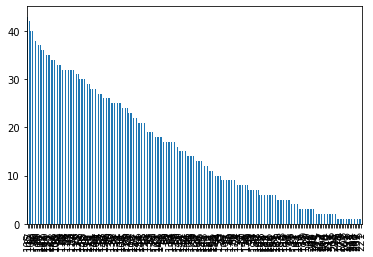

In [12]:
pd.value_counts(df['Account length']).plot(kind="bar")

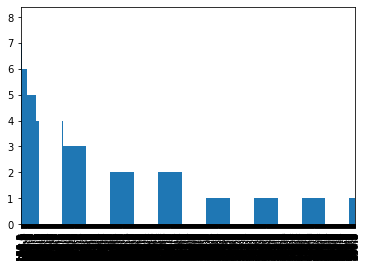

In [13]:
pd.value_counts(df['Total day minutes']).plot(kind="bar")

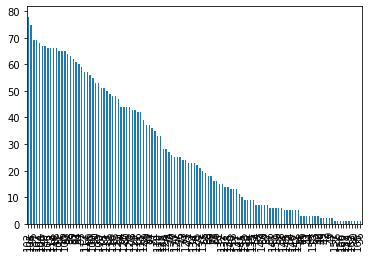

In [15]:
pd.value_counts(df['Total day calls']).plot(kind="bar")

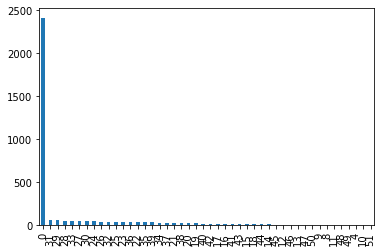

In [16]:
pd.value_counts(df['Number vmail messages']).plot(kind="bar")

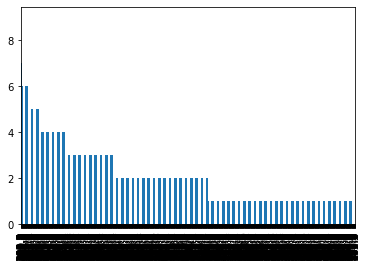

In [17]:
pd.value_counts(df['Total eve minutes']).plot(kind="bar")

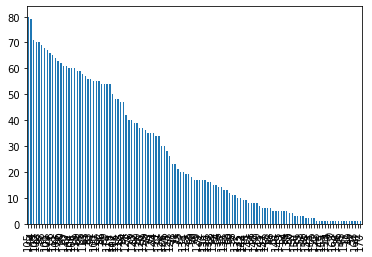

In [18]:
pd.value_counts(df['Total eve calls']).plot(kind="bar")

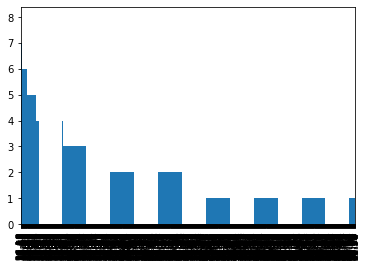

In [19]:
pd.value_counts(df['Total day charge']).plot(kind="bar")

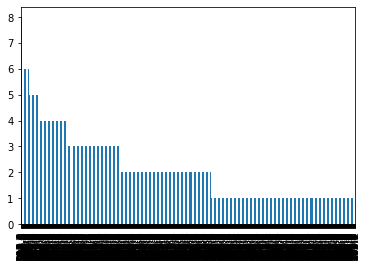

In [23]:
pd.value_counts(df['Total night minutes']).plot(kind="bar")

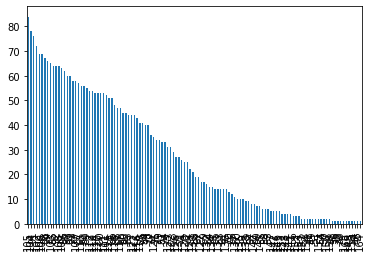

In [24]:
pd.value_counts(df['Total night calls']).plot(kind="bar")

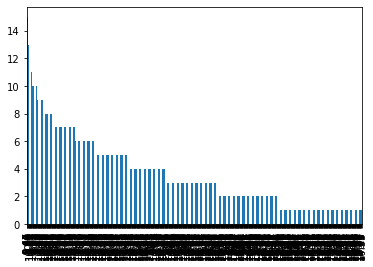

In [25]:
pd.value_counts(df['Total night charge']).plot(kind="bar")

In [40]:
#Dropping Account Length as it doesnt make a sense here
df = df.drop('Account length',axis=1)

# First things first: analysing 'Churn Rate'

In [45]:
#finding the number of customers who churned and who did not
churned = df['Churn'] == True
not_churned = df['Churn']== False
print("Churned : ",churned.sum())
print("Not churned : ",not_churned.sum())


Churned :  483
Not churned :  2850


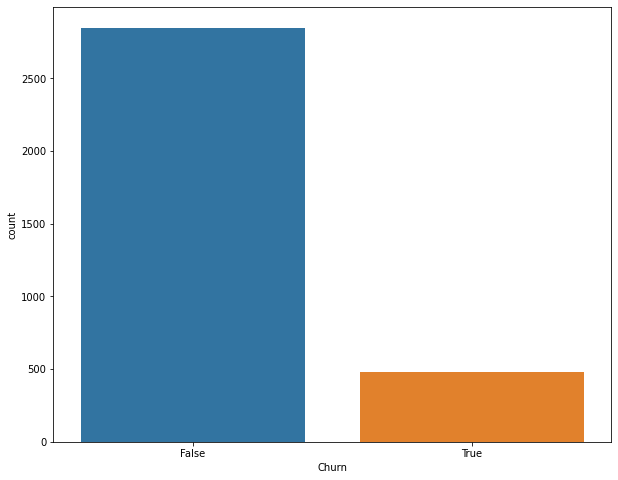

In [ ]:
# bar graph of churn
plt.figure(figsize=(10,8))
sns.countplot(x='Churn', data=df)
plt.show()


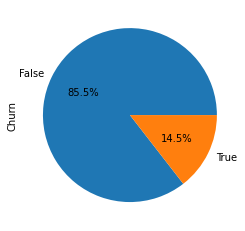

In [ ]:
#pie chart of churn
df['Churn'].value_counts().plot(kind='pie',label = 'Churn',autopct='%1.1f%%')

Here we see the percentage of customers who churned is about 14.5 percent.

In [ ]:
#getting unique Area Codes
df['Area code'].unique()

array([415, 408, 510])

In [ ]:
#Replacing Yes/No values with 1 and 0
df['International plan'] = df['International plan'].replace({"Yes":1,"No":0}).astype(int)
df['Voice mail plan'] = df['Voice mail plan'].replace({"Yes":1,"No":0}).astype(int)

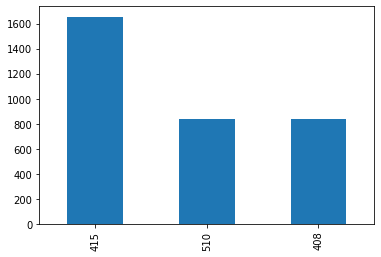

In [ ]:
pd.value_counts(df['Area code']).plot(kind="bar")

In [ ]:
df.State.unique()

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

# Checking Voice-Mail Feature

In [ ]:
#Voice-Mail Feature Messages
print('Unique vmail messages',df['Number vmail messages'].unique())
print("\n")
df['Number vmail messages'].describe()

Unique vmail messages [25 26  0 24 37 27 33 39 30 41 28 34 46 29 35 21 32 42 36 22 23 43 31 38
 40 48 18 17 45 16 20 14 19 51 15 11 12 47  8 44 49  4 10 13 50  9]




count    3333.000000
mean        8.099010
std        13.688365
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max        51.000000
Name: Number vmail messages, dtype: float64

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


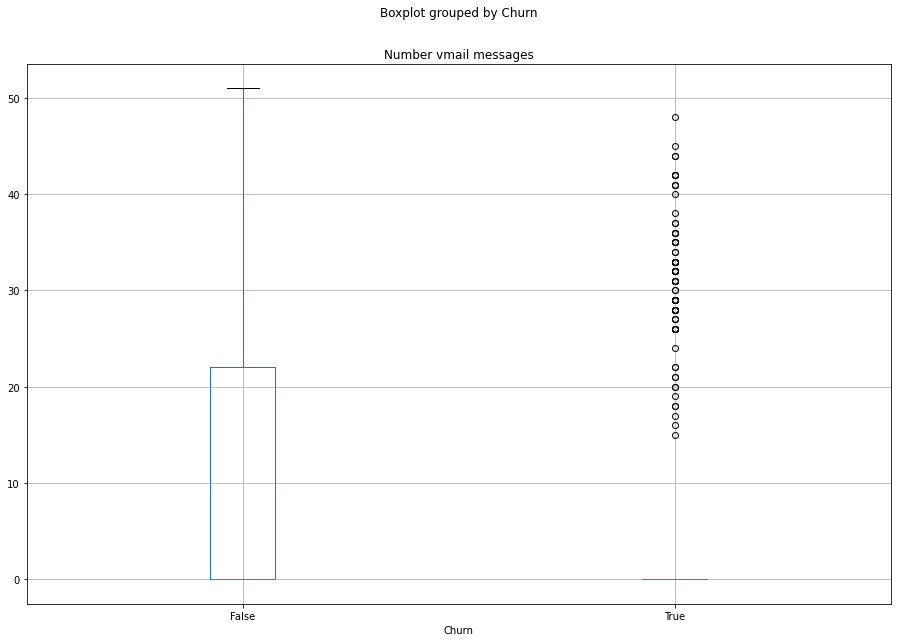

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.show()
df.boxplot(column='Number vmail messages', by='Churn',figsize=(15, 10))



We can Notice for Voice-Mail Feature when there are more than 20 voice-mail messages then certainly there is a churn indicating improving the voice-mail feature or setting a limit and check whether a customer is retianed.
According to my hypothesis :

1.Voice-Mail Service Upgradation 2.Setting up a limit on Voice-Mail service strictly no more than 25 voice mails. 3.Quality Drop in Voice-Mail after 25 voice mails.


# Total-Minutes in Morning Affecting the Churn Rate

In [ ]:
print('Maximum number of minutes:',df['Total day minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total day minutes'].max()/60))
print('Minimum number of minutes:',df['Total day minutes'].min())
print('Average number of minutes:',df['Total day minutes'].mean())

Maximum number of minutes: 350.8 i.e. Max number of Hours  spent: 6
Minimum number of minutes: 0.0
Average number of minutes: 179.77509750975094


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


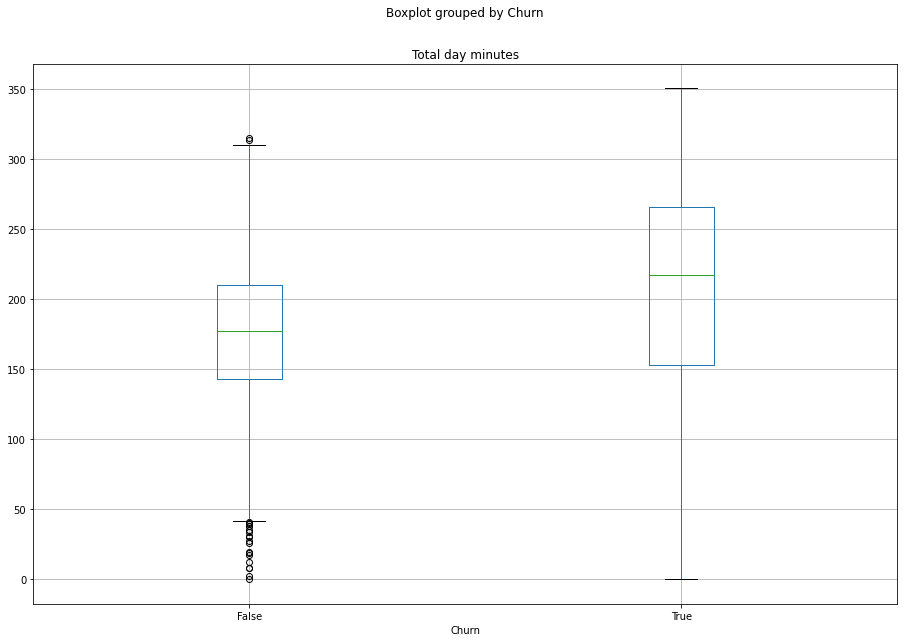

In [49]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


plt.show()
df.boxplot(column='Total day minutes', by='Churn',figsize=(15, 10))

We can infer from above box-plot that with users spending more 225 minutes or more i.e. approx 4hrs tend to switch to other operator.

According to my hypothesis, following would be the factors that should be implemented:
1.Network Disturbance during a Call

2.Cracking sound or noise during a call

3.Need to Upgrade or make smarter use of technologies like VoLTE to improve Voice Quality.

4. Network Upgradation

In [ ]:
print('Maximum number of calls:',df['Total day calls'].max())
print('Minimum number of calls:',df['Total day calls'].min())
print('Average number of calls:',df['Total day calls'].mean())

Maximum number of calls: 165
Minimum number of calls: 0
Average number of calls: 100.43564356435644


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


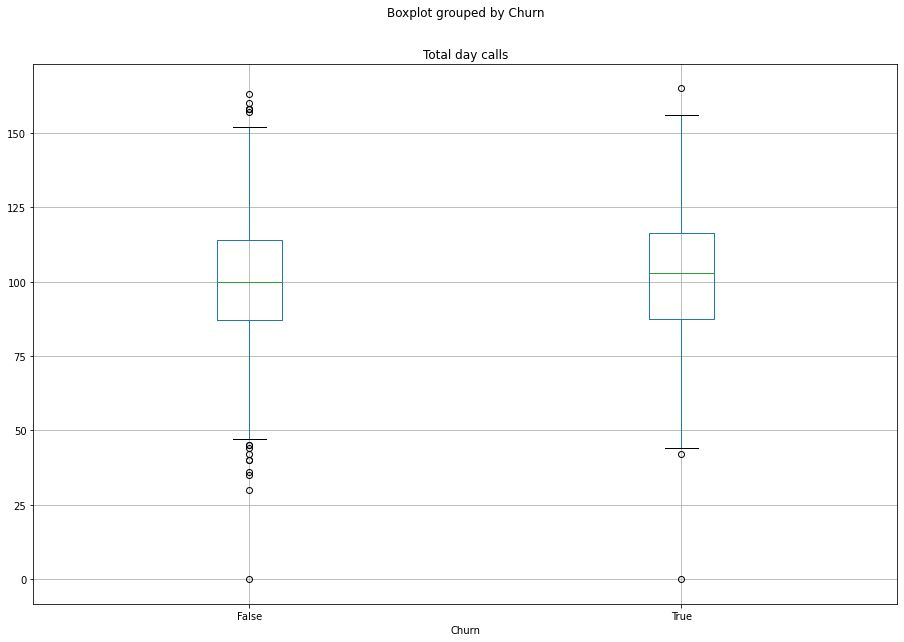

In [ ]:

df.boxplot(column='Total day calls', by='Churn',figsize=(15, 10))



We can infere here that on an average a 100 calls are made which is a good indication for the company.But we can also note that for the churn customer the median is slightly higher than 100 which indicates there are call drops which may lead to more calls in a morning.



In [ ]:
print('Maximum number of charge:',df['Total day charge'].max())
print('Minimum number of charge:',df['Total day charge'].min())
print('Average number of charge:',df['Total day charge'].mean())


Maximum number of charge: 59.64
Minimum number of charge: 0.0
Average number of charge: 30.562307230723075


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


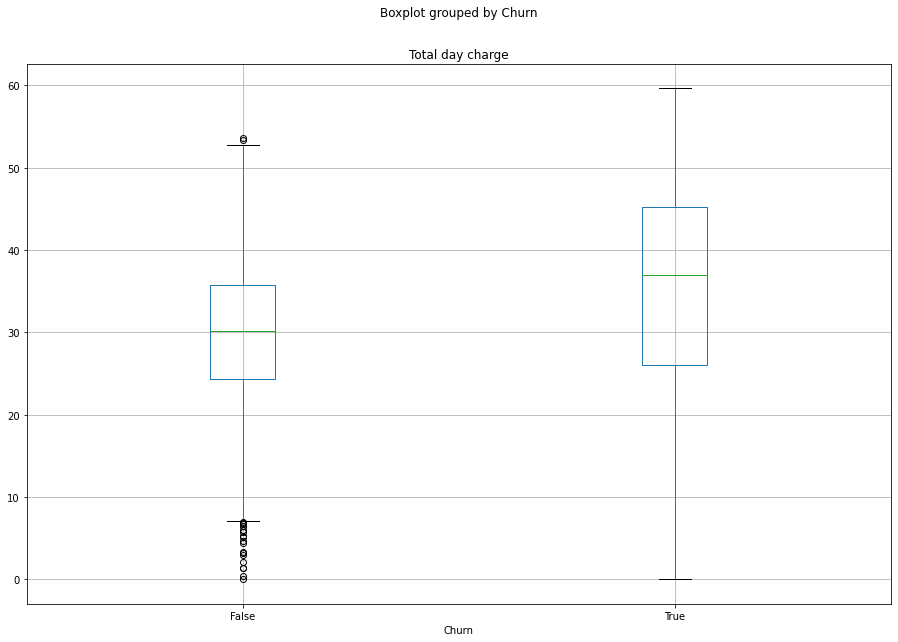

In [ ]:
df.boxplot(column='Total day charge', by='Churn',figsize=(15, 10))

Here we can clearly indicate a good strategy to be implemented. As from above infered box-plots we can conclude one thing i.e Customers having more minutes spent on the network tend to leave the it's subscription and from the above box-plot it clearly indicates that there is defect in the pricing startegy of the company.

According to my Hypothsis:
1.Startegy of pricing needs to be re-evaluated.
2. The Clients who have high call minutes and calls need a discount in the end.

# Evening time Affecting the Churn Rate


In [ ]:
print('Maximum number of minutes:',df['Total eve minutes'].max(),'i.e. Max number of Hours  spent:',round(df['Total eve minutes'].max()/60))
print('Maximum number of minutes:',df['Total eve minutes'].min())
print('Average number of minutes:',df['Total eve minutes'].mean())

Maximum number of minutes: 363.7 i.e. Max number of Hours  spent: 6
Maximum number of minutes: 0.0
Average number of minutes: 200.98034803480348


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


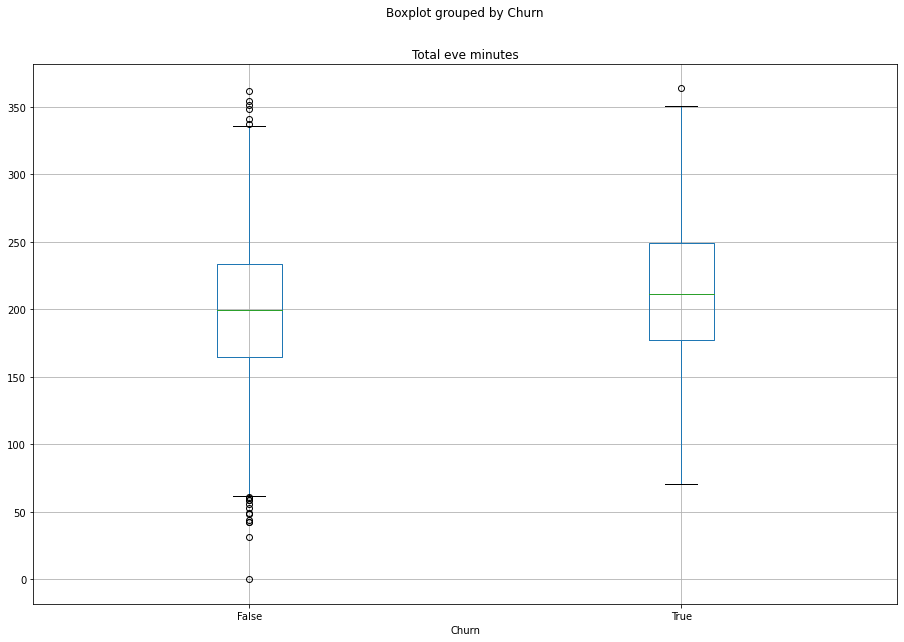

In [ ]:
df.boxplot(column='Total eve minutes', by='Churn',figsize=(15, 10))

In [ ]:
print('Maximum number of calls:',df['Total eve calls'].max())
print('Minimum number of calls:',df['Total eve calls'].min())
print('Average number of calls:',df['Total eve calls'].mean())

Maximum number of calls: 170
Minimum number of calls: 0
Average number of calls: 100.11431143114311


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


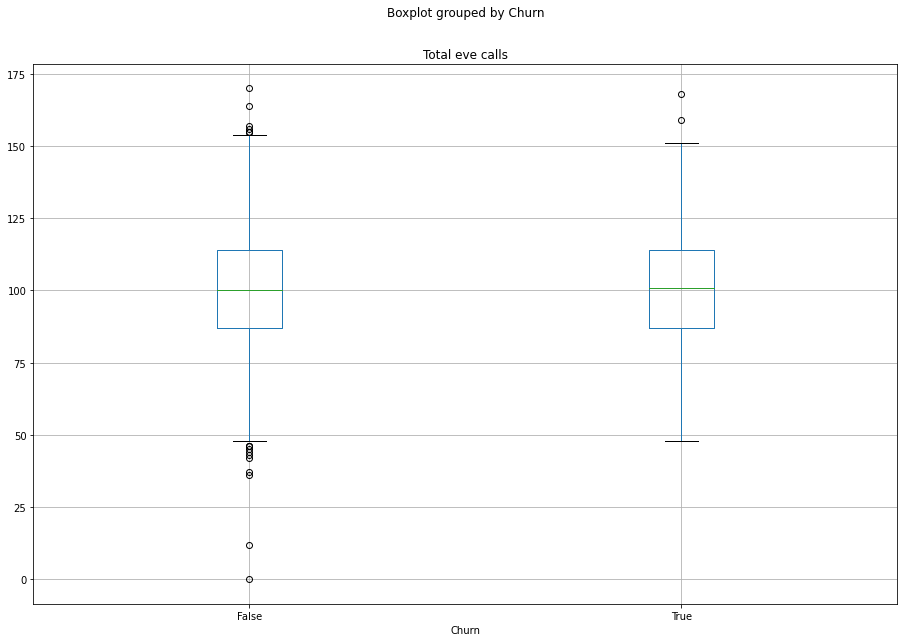

In [ ]:
df.boxplot(column='Total eve calls', by='Churn',figsize=(15, 10))

In [ ]:
print('Maximum number of charge:',df['Total eve charge'].max())
print('Minimum number of charge:',df['Total eve charge'].min())
print('Average number of charge:',df['Total eve charge'].mean())



Maximum number of charge: 30.91
Minimum number of charge: 0.0
Average number of charge: 17.083540354035403


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


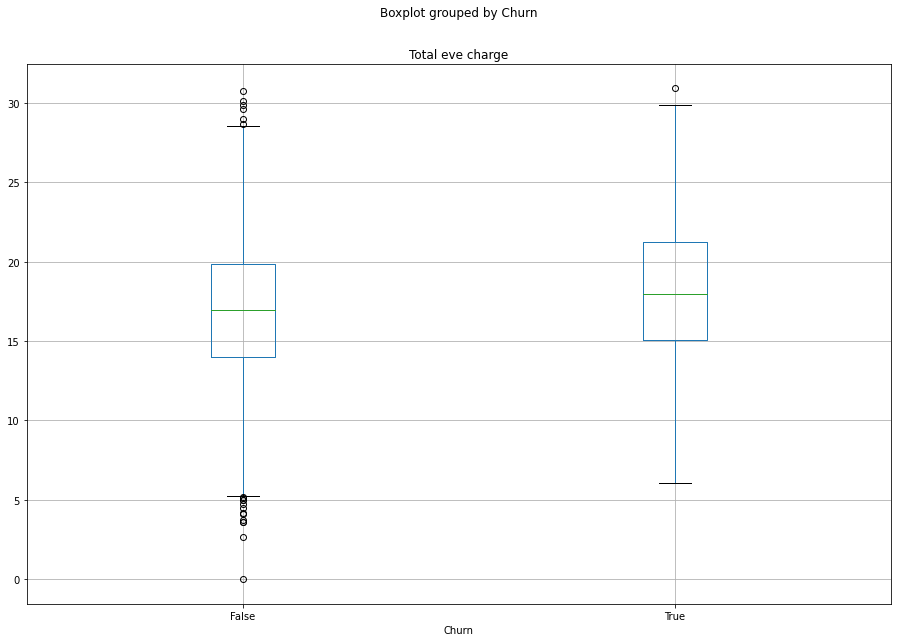

In [ ]:
df.boxplot(column='Total eve charge', by='Churn',figsize=(15, 10))

The customers who had higher calls in the evening are the churned customers.


# Night Time Affecting Churn Rate

In [ ]:
print('Maximum number of minutes:',df['Total night minutes'].max(),'i.e. Max number of Hours spent:',round(df['Total night minutes'].max()/60))
print('Minimum number of minutes:',df['Total night minutes'].min())
print('Average number of minutes:',df['Total night minutes'].mean())


Maximum number of minutes: 395.0 i.e. Max number of Hours spent: 7
Minimum number of minutes: 23.2
Average number of minutes: 200.87203720372037


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


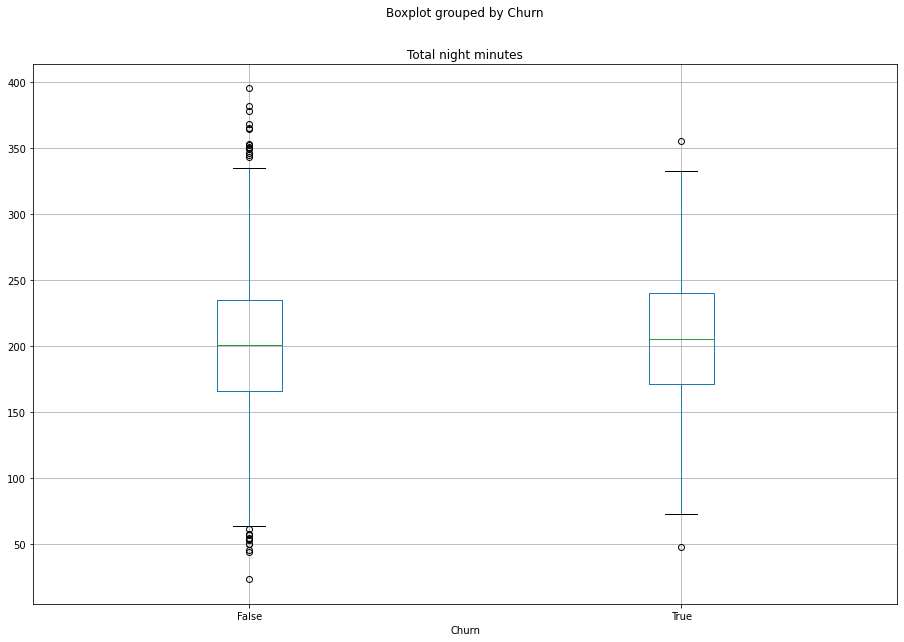

In [ ]:
df.boxplot(column='Total night minutes', by='Churn',figsize=(15, 10))

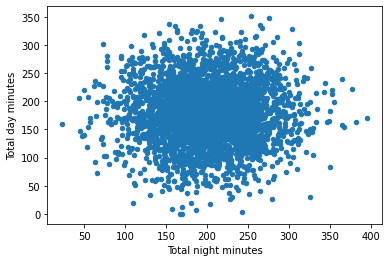

In [ ]:
df.plot.scatter(x='Total night minutes', y='Total day minutes')        

The Loyal Customers spend more time in night according to the box-plot.

In [ ]:
print('Maximum number of calls:',df['Total night calls'].max())
print('Minimum number of calls:',df['Total night calls'].min())
print('Average number of calls:',df['Total night calls'].mean())



Maximum number of calls: 175
Minimum number of calls: 33
Average number of calls: 100.10771077107711


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


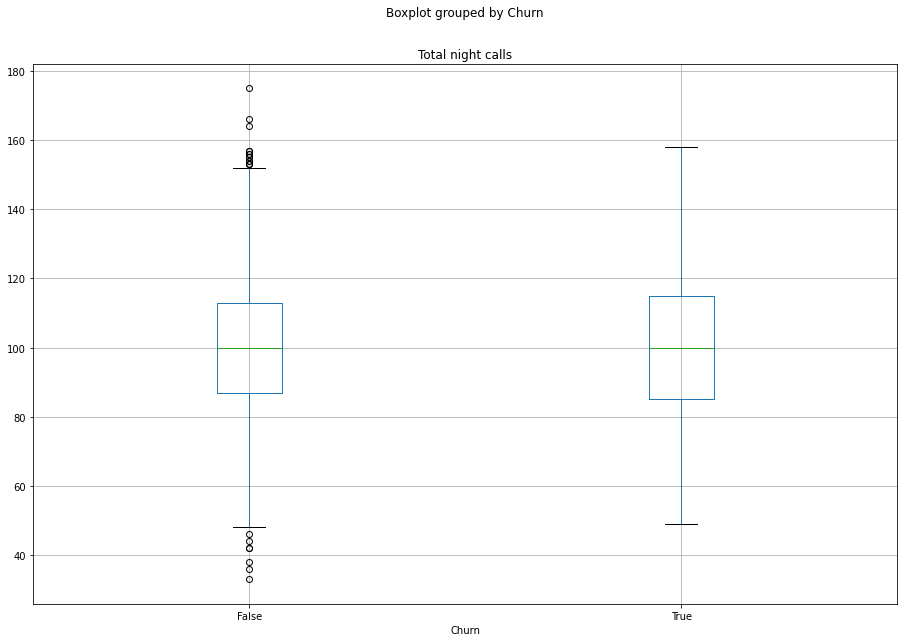

In [ ]:
df.boxplot(column='Total night calls', by='Churn',figsize=(15, 10))

Still Calls are made more by the churned customers.

In [ ]:
print('Maximum number of charge:',df['Total night charge'].max())
print('Minimum number of charge:',df['Total night charge'].min())
print('Average number of charge:',df['Total night charge'].mean())


Maximum number of charge: 17.77
Minimum number of charge: 1.04
Average number of charge: 9.03932493249325


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


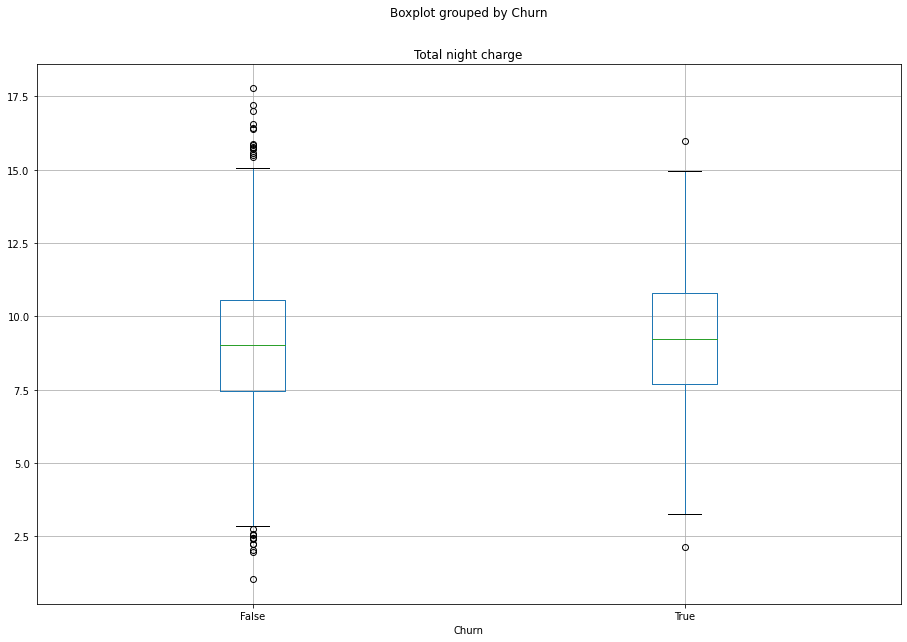

In [ ]:

df.boxplot(column='Total night charge', by='Churn',figsize=(15, 10))



Again Optimization of The Charges would lead to a loyal customer.

# International Calls Affecting the Churn Rate

In [ ]:
print('Maximum number of minutes:',df['Total intl minutes'].max(),'i.e. Max number of Hours spent:',round(df['Total intl minutes'].max()/60))
print('Minimum number of minutes:',df['Total intl minutes'].min())
print('Average number of minutes:',df['Total intl minutes'].mean())


Maximum number of minutes: 20.0 i.e. Max number of Hours spent: 0
Minimum number of minutes: 0.0
Average number of minutes: 10.237293729372938


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


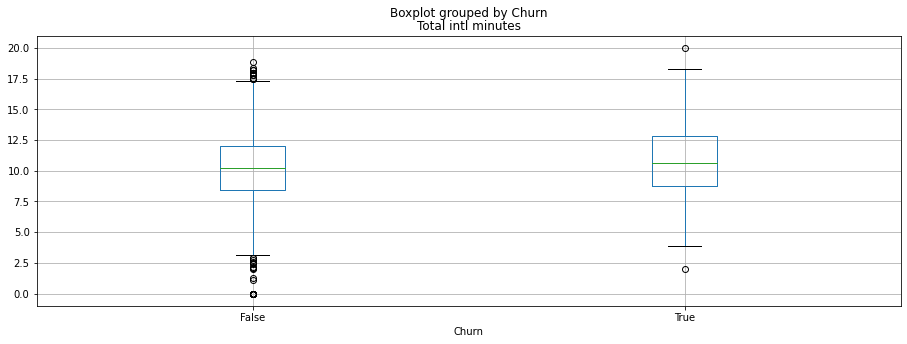

In [ ]:
df.boxplot(column='Total intl minutes', by='Churn',figsize=(15,5))


Users who make the International Call tend to spend more minutes

In [ ]:
print('Maximum number of calls:',df['Total intl calls'].max())
print('Minimum number of calls:',df['Total intl calls'].min())
print('Average number of calls:',df['Total intl calls'].mean())

Maximum number of calls: 20
Minimum number of calls: 0
Average number of calls: 4.4794479447944795


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


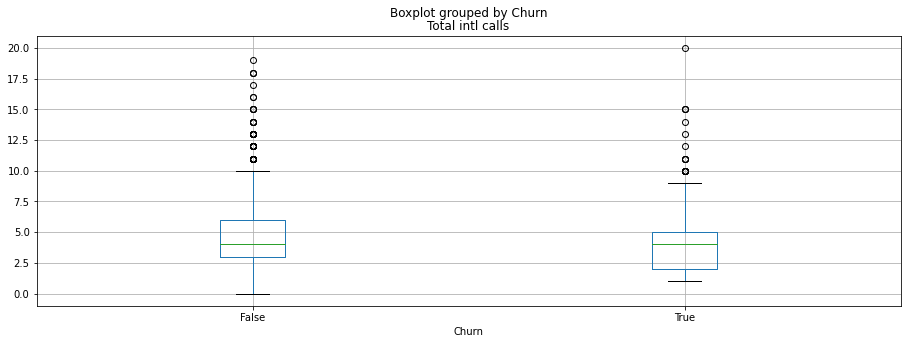

In [ ]:
df.boxplot(column='Total intl calls', by='Churn',figsize=(15,5))

These Calls clearly indicate that clients without International Plan Suffer and May Leave the Operator.

In [ ]:
print('Maximum number of charge:',df['Total intl charge'].max())
print('Minimum number of charge:',df['Total intl charge'].min())
print('Average number of charge:',df['Total intl charge'].mean())



Maximum number of charge: 5.4
Minimum number of charge: 0.0
Average number of charge: 2.7645814581458144


/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


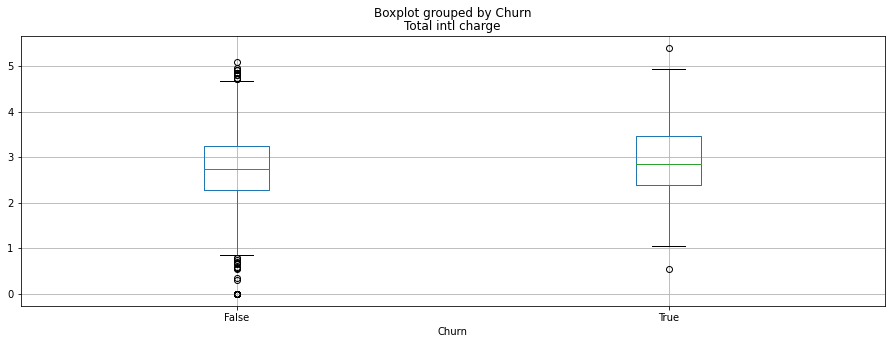

In [ ]:
df.boxplot(column='Total intl charge', by='Churn',figsize=(15,5))

Different Pricing Strategy and International Calling Rate Optimization would lead to lower churn rate.

# Churn According to States

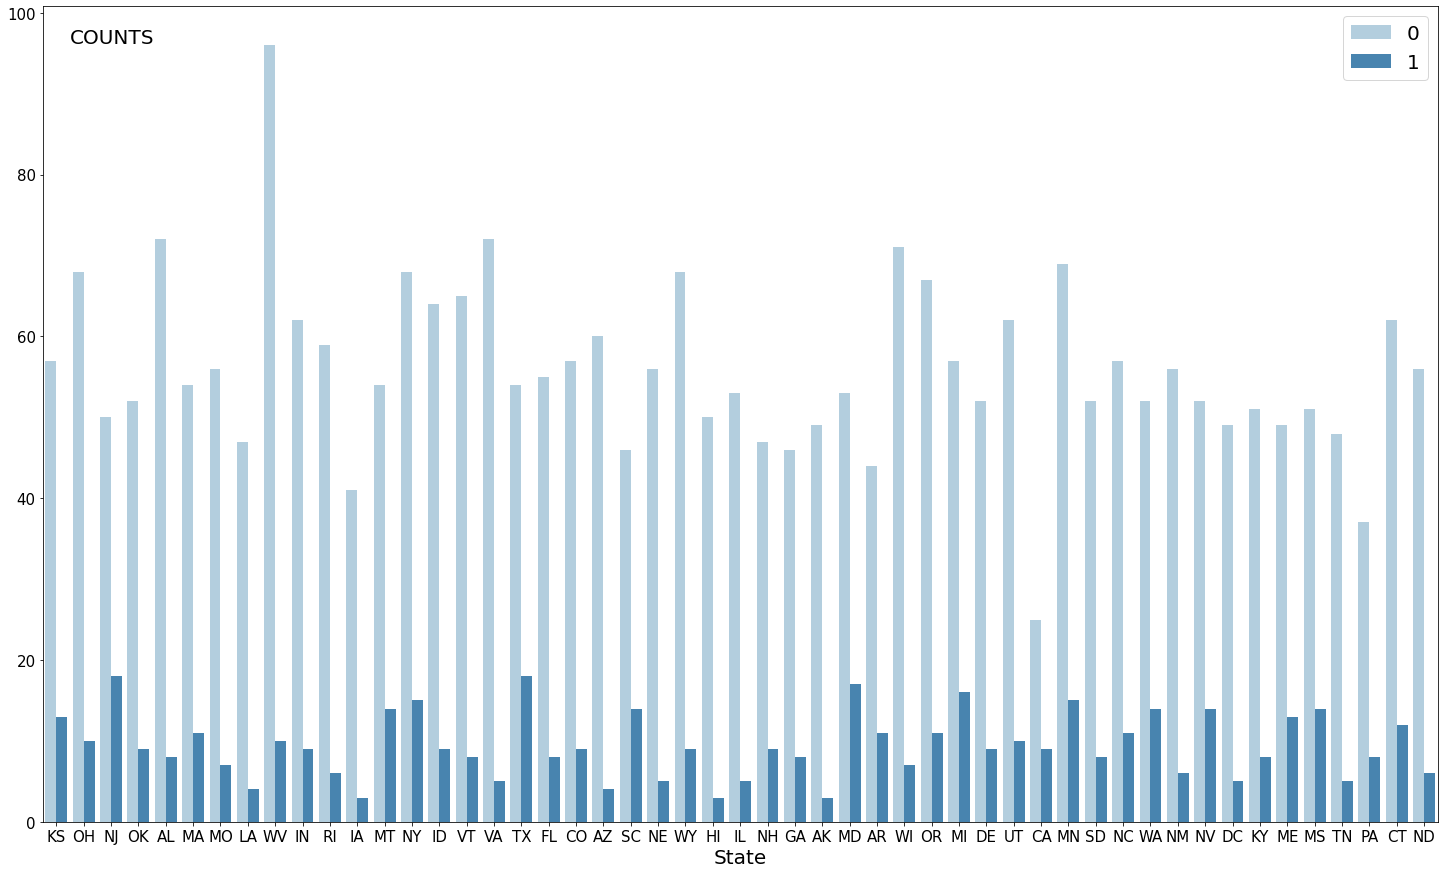

In [ ]:
fig, axz = plt.subplots(figsize=(25,15))

axz = sns.countplot(x='State', hue='Churn', data=df, palette='Blues')


axz.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20)
axz.set_xlabel('State', size=20,rotation=0)
axz.yaxis.set_label_coords(0.05, 0.95)  # (x, y)
axz.legend(loc=0,fontsize=20);

axz.tick_params(labelsize=15)  # Changes size of the values on the label



Texas,Maryland have the bit more churn rate than usual, A Network Upgradation would be strongly suggested in these areas.


# Customer Service Calls

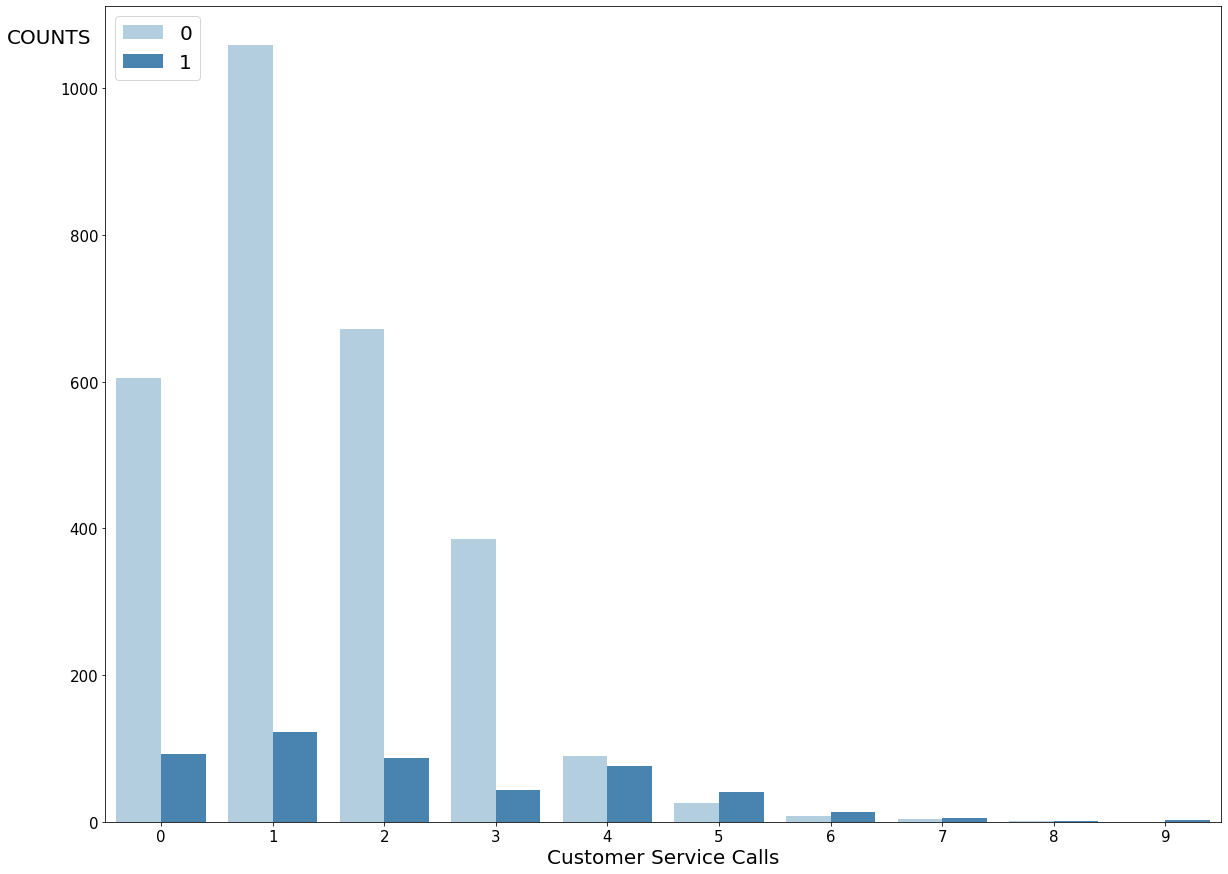

In [ ]:

fig, axz = plt.subplots(figsize=(20,15))

axz = sns.countplot(x='Customer service calls', hue='Churn', data=df, palette='Blues')


axz.set_ylabel('COUNTS', rotation=0, labelpad=100,size=20)
axz.set_xlabel('Customer Service Calls', size=20)
axz.yaxis.set_label_coords(-0.05, 0.95)  # (x, y)
axz.legend(loc=0,fontsize=20);

axz.tick_params(labelsize=15)  # Changes size of the values on the label


While some customers are lazy and hence without resolving the issue they have jumped to other network operator,while the customers who have called once also have high churn rate indicating their issue was not solved in first attempt.

A Feedback is neccesary in such situations.

A Confirmation to the Customer is important, that there issue would be solved in first attempt or not.

In [ ]:
df['Churn'] = df['Churn'].replace({bool(True):1,bool(False):0})



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  after removing the cwd from sys.path.


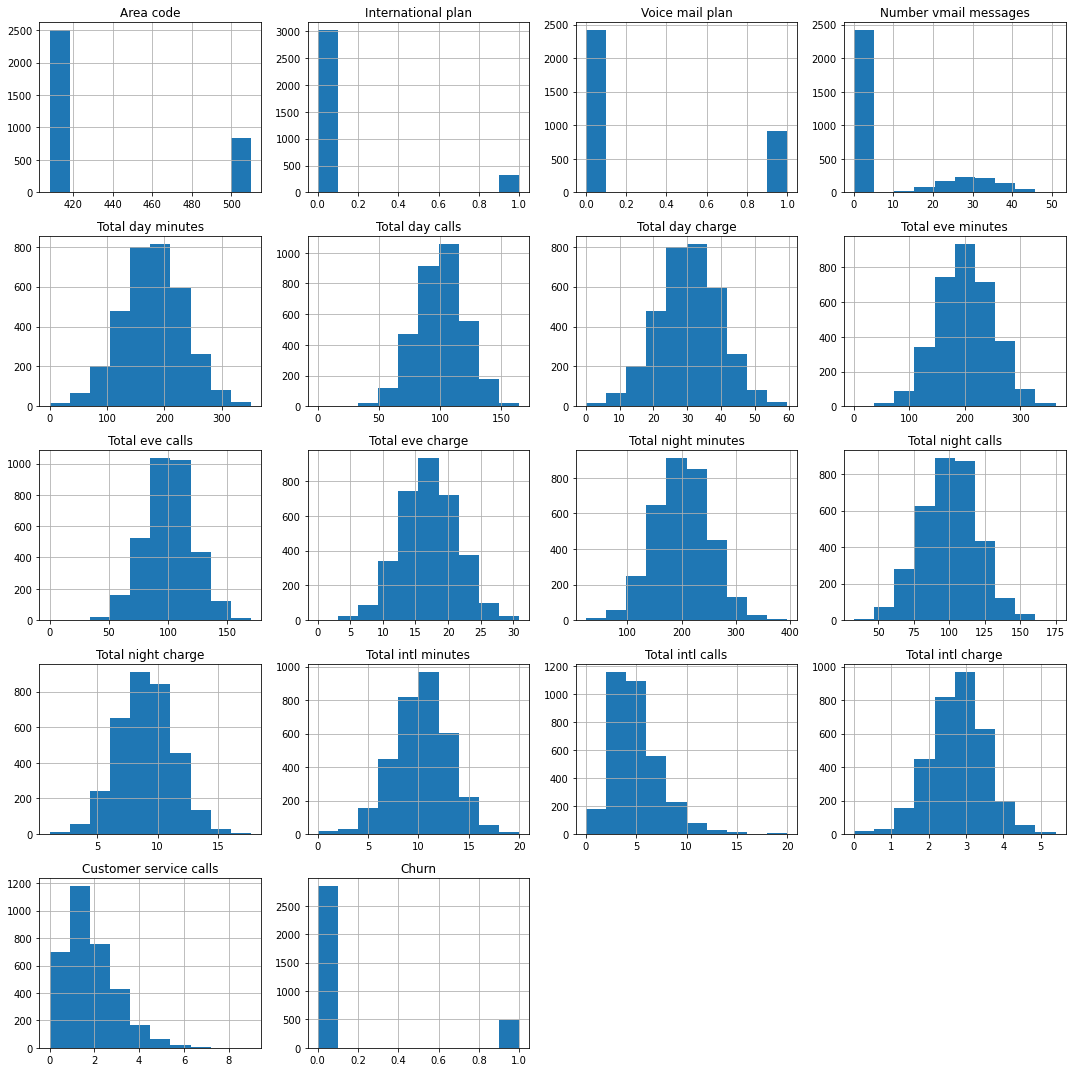

In [ ]:
#frequency distribution of all data

fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(df,ax=ax)
plt.tight_layout()


In [ ]:
df.columns

Index(['State', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')

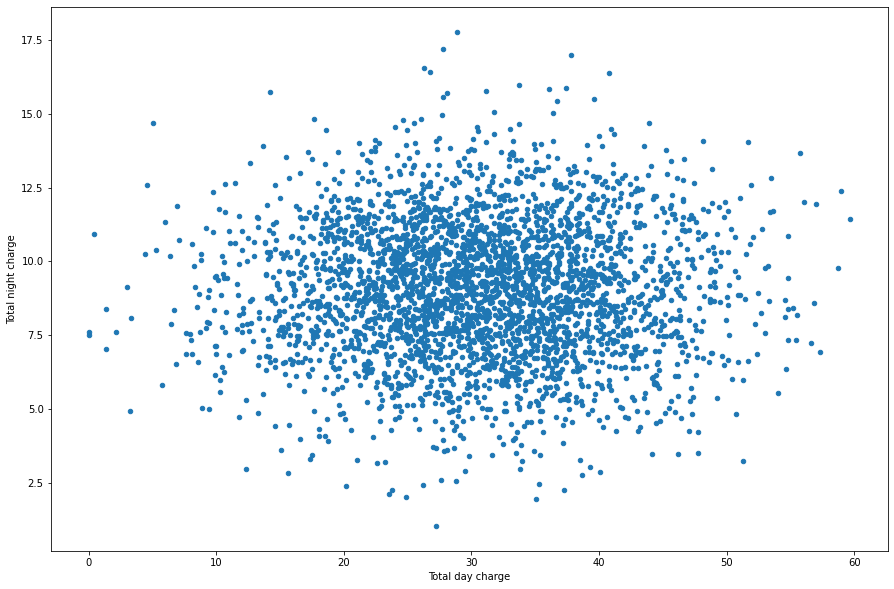

In [52]:
import seaborn as sns #visualization
import matplotlib.pyplot as plt #visualization
%matplotlib inline



df.plot.scatter(x='Total day charge', y='Total night charge',figsize=(15, 10))


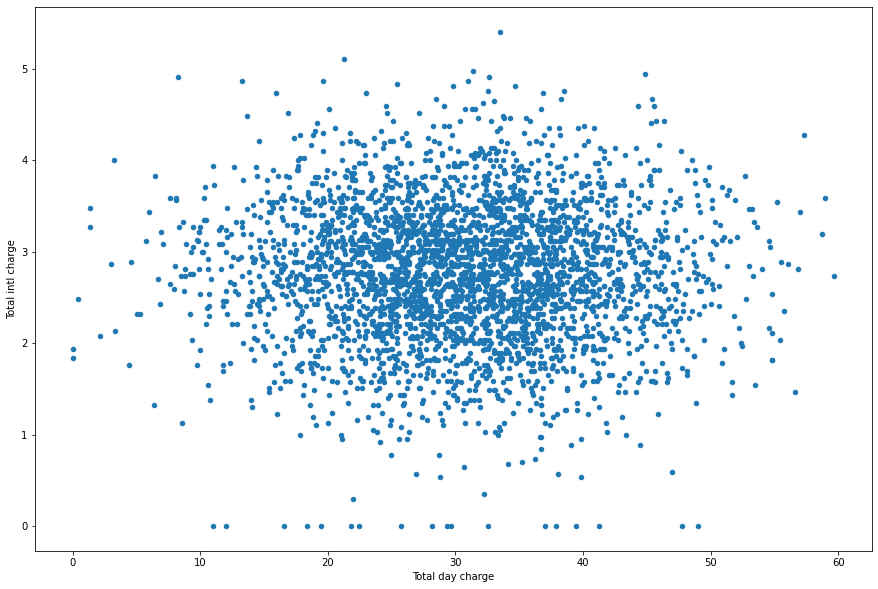

In [55]:
df.plot.scatter(x='Total day charge', y='Total intl charge',figsize=(15, 10))

# Correlation

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


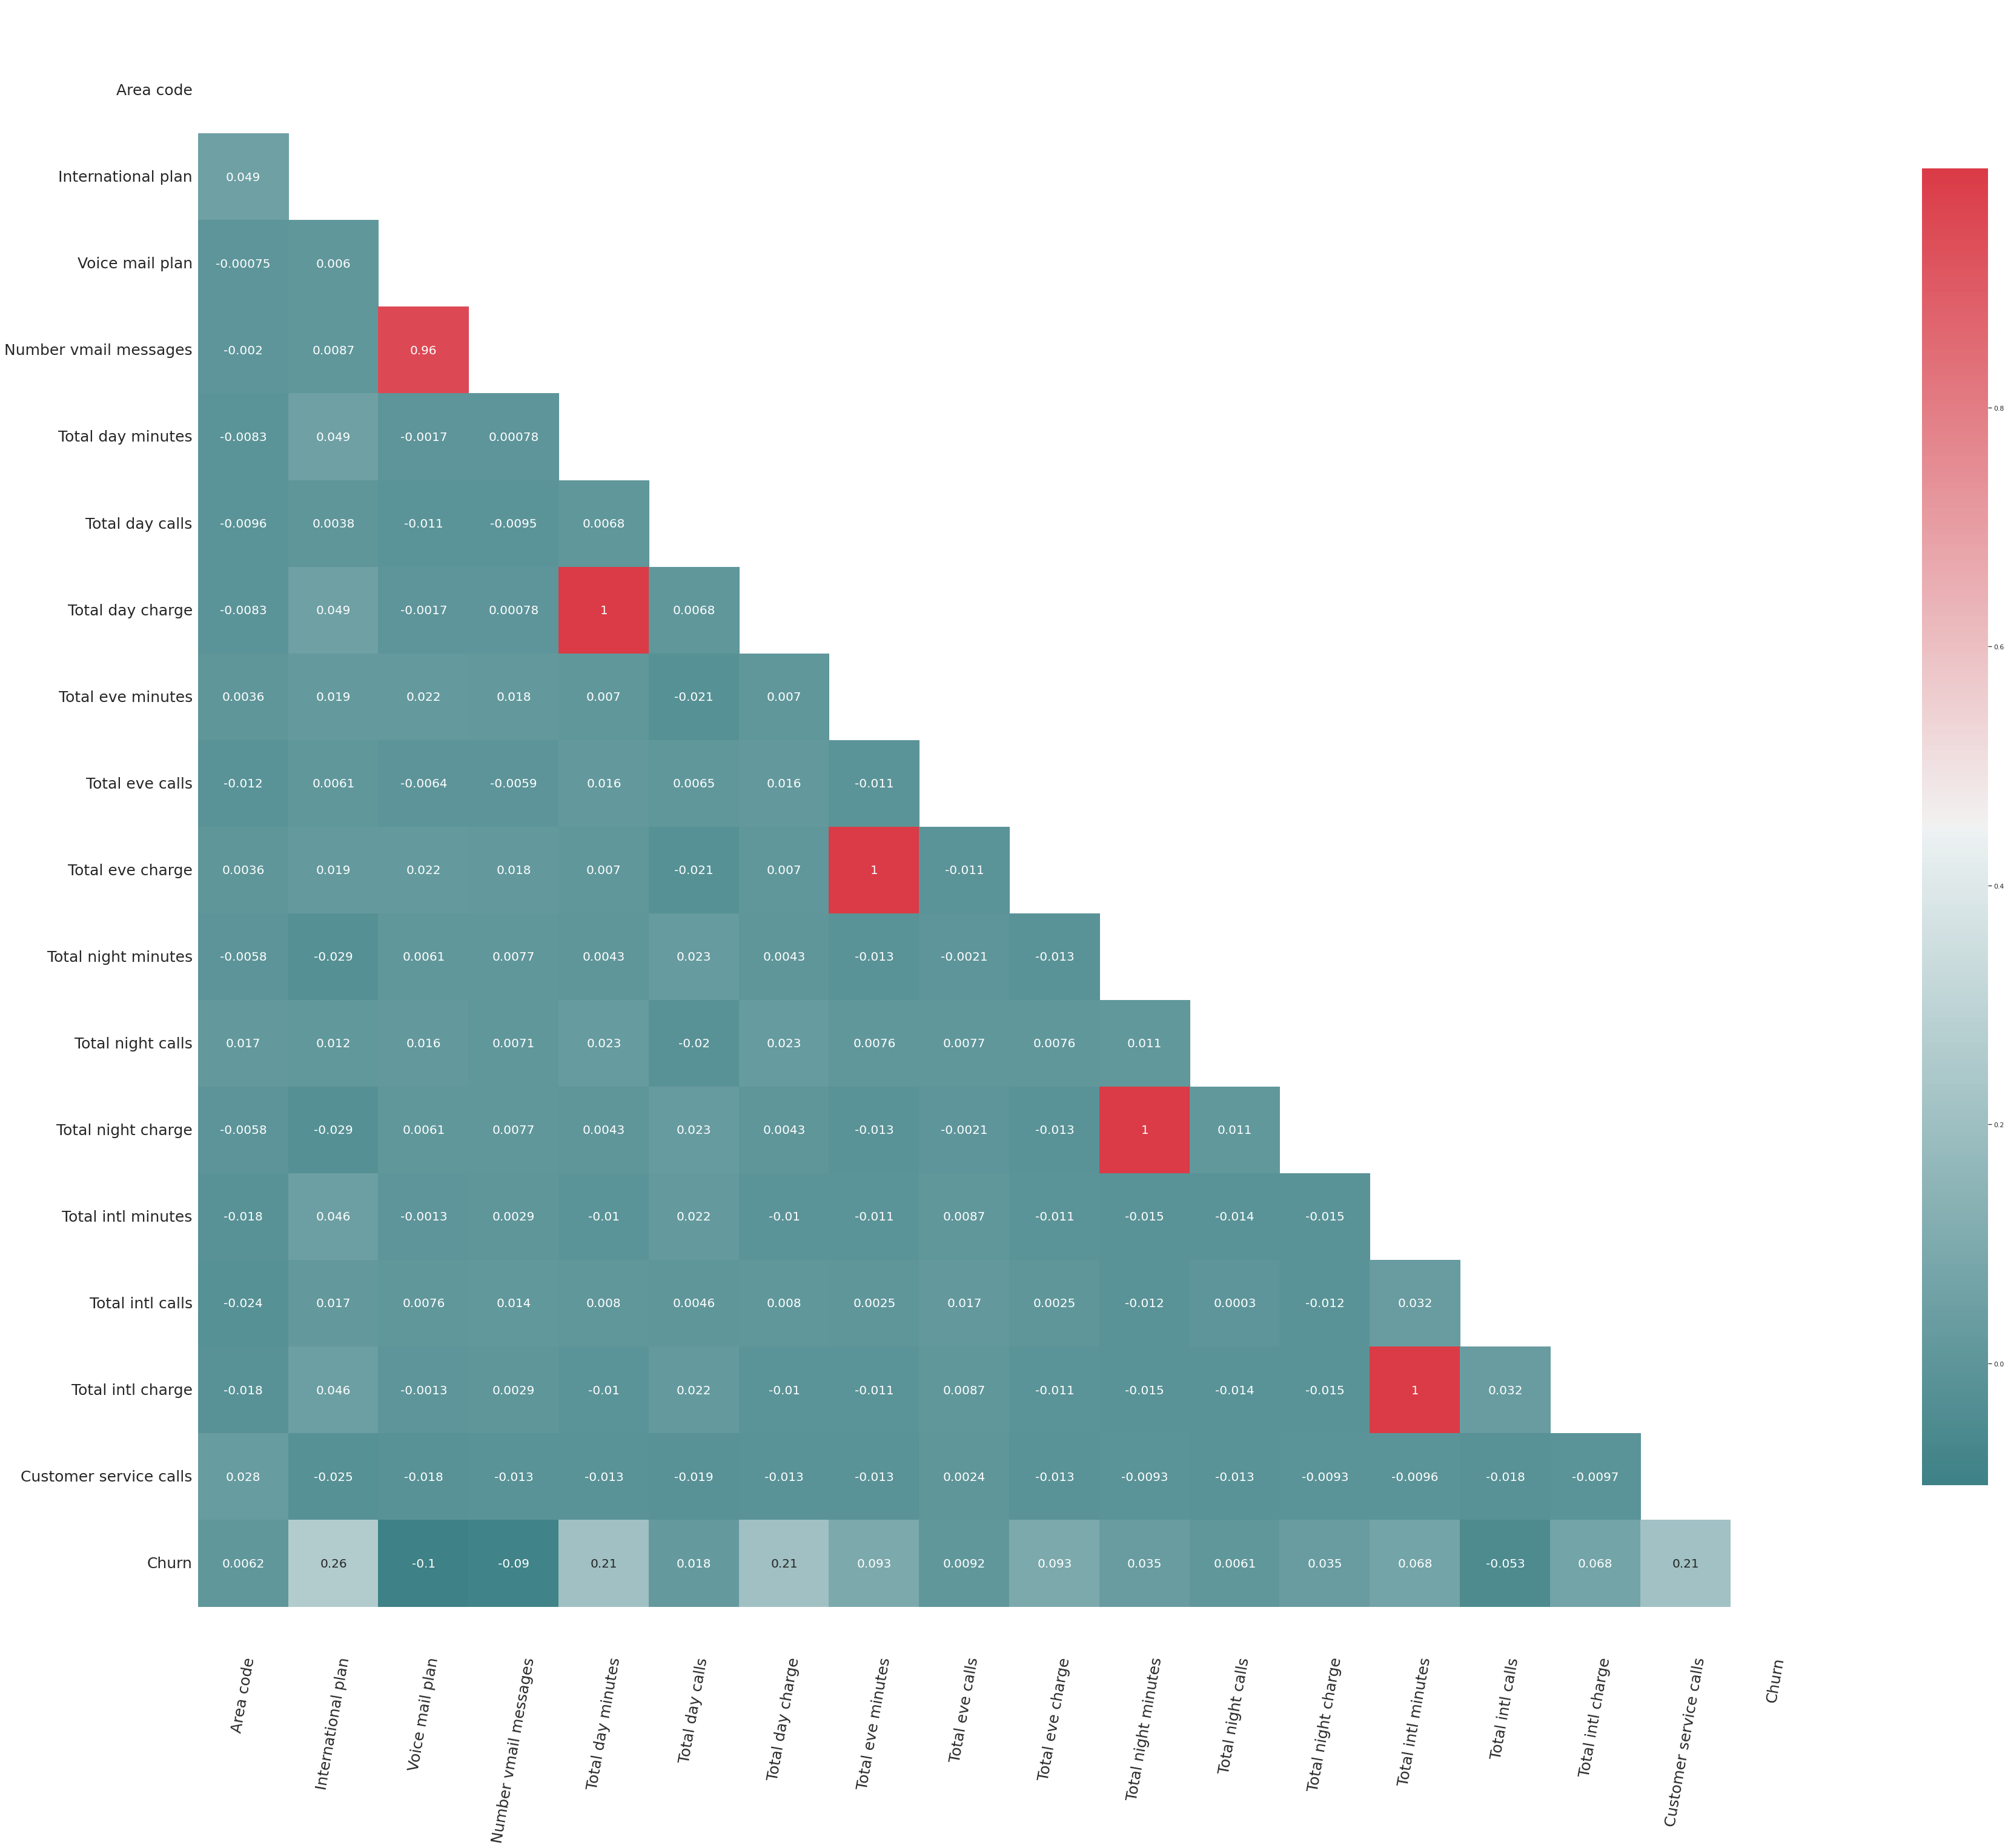

In [ ]:
# Now that we have our features, let's plot them on a correlation matrix to remove anything that might 
# cause multi-colinearity within our model

sns.set(style="white")
# Creating the data
data = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(data, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(60,50))


# Create a custom color palette
cmap = sns.diverging_palette(200, 10,as_cmap=True)  

# as_cmap returns a matplotlib colormap object rather than a list of colors

# Blue = Good (low correlation), Red = Bad (high correlation) between the independent variables

# Plot the heatmap
g = sns.heatmap(data=data, annot=True, cmap=cmap, ax=ax,
                 mask=mask, # Splits heatmap into a triangle
                annot_kws={"size":20},  #Annotation size
               cbar_kws={"shrink": 0.8} # Color bar size
               );
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

# Changes size of the values on the label
ax.tick_params(labelsize=25) 

ax.set_yticklabels(g.get_yticklabels(), rotation=0);
ax.set_xticklabels(g.get_xticklabels(), rotation=80);



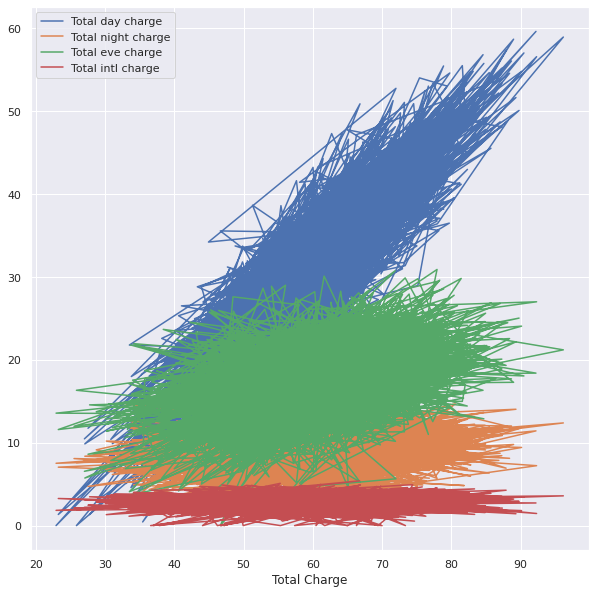

In [ ]:
df.plot(x="Total Charge", y=["Total day charge", "Total night charge","Total eve charge","Total intl charge"],
        kind="line", figsize=(10, 10))
 

# Conclusions

# We can definitely suggest to prevent churn :

#1. Upgrading network to improve services for long duration users.

#2. Updating Pricing Strategies.

#3. Updating and Optimizing Internationall Call Rates.

#4. Implmenting a better network infrastructure in Maryland and Texas Areas where there is more Churn Rate.

# 5. Upgrading their services when in emegency only in evening period as low network traffic.